# 目標價估算

## 程式實作：人工方式估算底部型態目標價

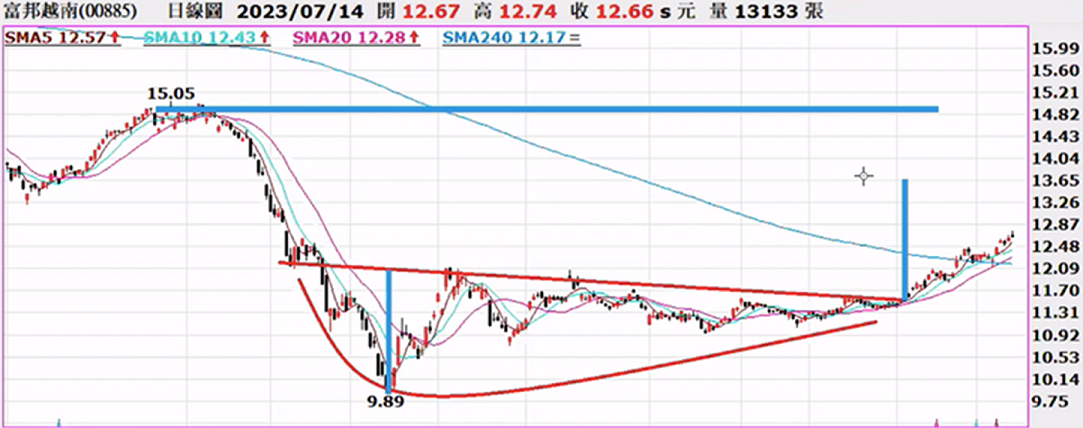

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2022年7月6日到2023年7月14日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day24.xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [3]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

In [4]:
# 手動設定轉折點
neckline_x = [date_to_index(df_k_line,'2022-12-08'),date_to_index(df_k_line,'2023-02-01')]
neckline_y = [df_k_line.iloc[neckline_x[0]]['Close'],df_k_line.iloc[neckline_x[1]]['Open']]
slope,intercept = np.polyfit(neckline_x,neckline_y,1)

# 從轉折點設定頸線
neckline_start_date = '2022-10-06'
neckline_start_price = slope * date_to_index(df_k_line,neckline_start_date) + intercept
neckline_end_date = '2023-06-05'
neckline_end_price = slope * date_to_index(df_k_line,neckline_end_date) + intercept

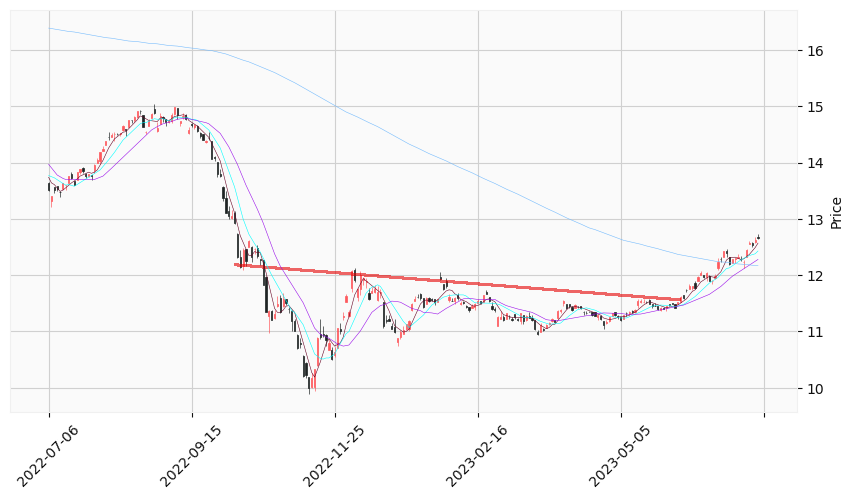

In [5]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_start_price),(neckline_end_date,neckline_end_price)]
                     ]

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.5, colors='xkcd:red', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

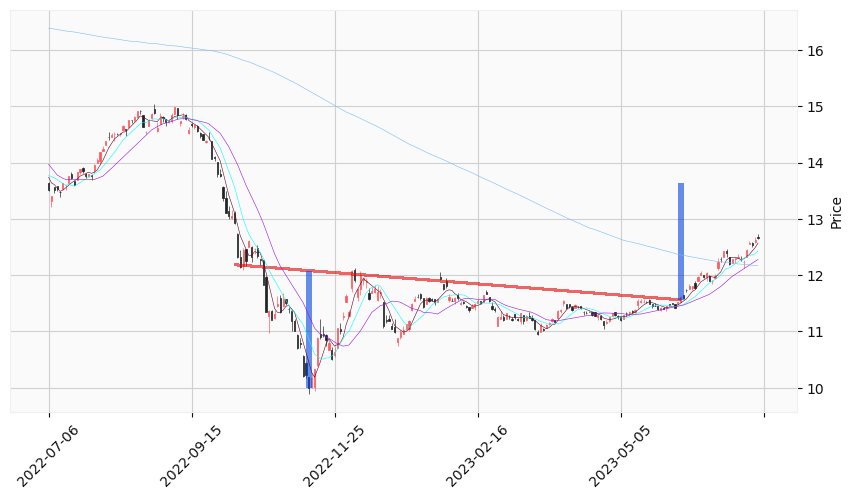

目標價：13.64


In [6]:
# 計算目標價
minimum_close_price_date = df_k_line['Close'].idxmin().strftime('%Y-%m-%d')
minimum_close_price = df_k_line['Close'].min()
on_neckline_price = slope * date_to_index(df_k_line,minimum_close_price_date) + intercept
target_price = (on_neckline_price - minimum_close_price) + neckline_end_price

# 設定頸線與目標價
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_start_price),(neckline_end_date,neckline_end_price)],
    [(minimum_close_price_date,minimum_close_price),(minimum_close_price_date,on_neckline_price)],
    [(neckline_end_date,neckline_end_price),(neckline_end_date,target_price)]
                     ]

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.5,3,3), colors=('xkcd:red','xkcd:blue','xkcd:blue'), alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

# 印出目標價資訊
print('目標價：{:.2f}'.format(target_price))

#### **對照**：改用第九天的「尋找轉折點函式」，並依其所找到的轉折點畫頸線及計算目標價

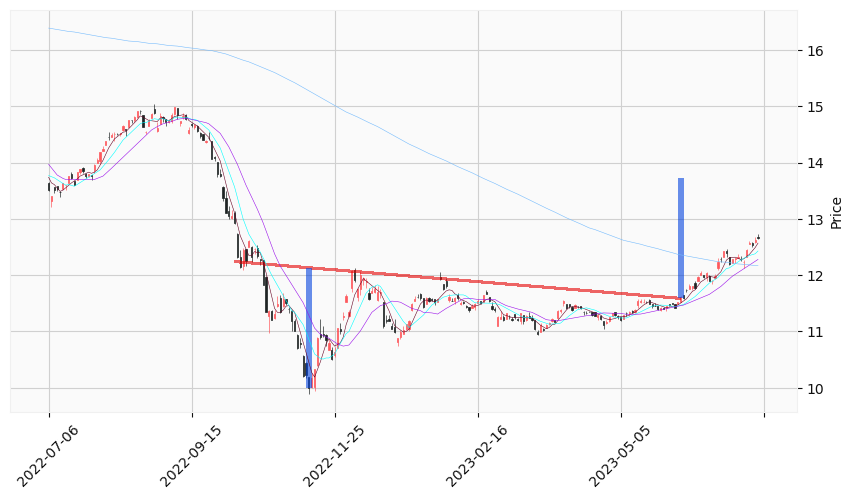

目標價：13.72


In [7]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'close',order=10)

# 人工方式設定頸線轉折點
neckline_x = [max_min.iloc[3].name,max_min.iloc[5].name]
neckline_y = [max_min.loc[neckline_x[0]]['Price'],max_min.loc[neckline_x[1]]['Price']]
slope,intercept = np.polyfit(neckline_x,neckline_y,1)

# 從轉折點設定頸線
neckline_start_date = '2022-10-06'
neckline_start_price = slope * date_to_index(df_k_line,neckline_start_date) + intercept
neckline_end_date = '2023-06-05'
neckline_end_price = slope * date_to_index(df_k_line,neckline_end_date) + intercept

# 計算目標價
minimum_close_price_date = df_k_line['Close'].idxmin().strftime('%Y-%m-%d')
minimum_close_price = df_k_line['Close'].min()
on_neckline_price = slope * date_to_index(df_k_line,minimum_close_price_date) + intercept
target_price = (on_neckline_price - minimum_close_price) + neckline_end_price

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定頸線與目標價
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_start_price),(neckline_end_date,neckline_end_price)],
    [(minimum_close_price_date,minimum_close_price),(minimum_close_price_date,on_neckline_price)],
    [(neckline_end_date,neckline_end_price),(neckline_end_date,target_price)]
                     ]

# 設定移動平均線
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.4,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.5,3,3), colors=('xkcd:red','xkcd:blue','xkcd:blue'), alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

# 印出目標價資訊
print('目標價：{:.2f}'.format(target_price))

## 程式實作：使用頭肩型態識別演算法進行型態辨識與計算目標價

In [8]:
##### 使用2022年2月25日到2023年4月7日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day13_Day14_Day23.xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

目標價 ＝ 頭部高度（18.77）＋ 頸線結束價格（58.57）＝ 77.34


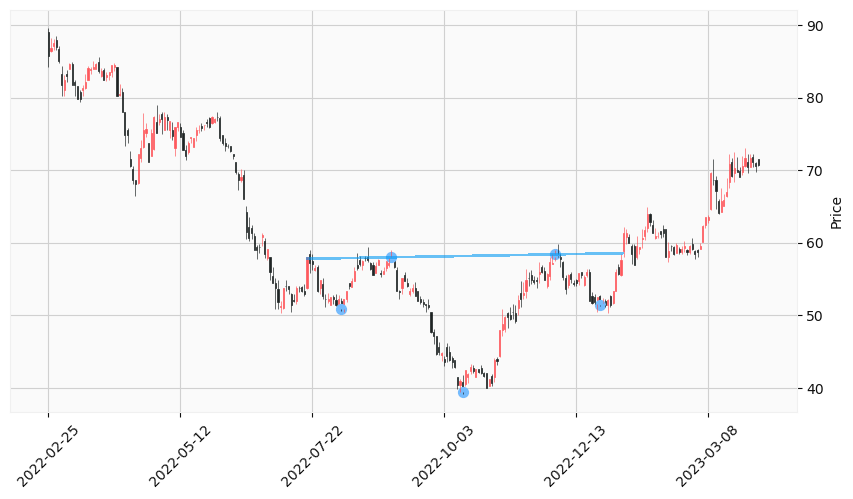

In [9]:
# 頭肩型態識別函式已經整合到myutils套件中
patterns = myutils.FindingHeadShoulderPatterns(df_k_line, 10)

for pattern in patterns :
    pattern_points_len = len(np.array(df_k_line['Close']))
    pattern_points = np.array([np.nan]*pattern_points_len)
    head_shoulder_points = pattern['points']
    pattern_points[head_shoulder_points[0][0]] = head_shoulder_points[0][2]
    pattern_points[head_shoulder_points[1][0]] = head_shoulder_points[1][2]
    pattern_points[head_shoulder_points[2][0]] = head_shoulder_points[2][2]
    pattern_points[head_shoulder_points[3][0]] = head_shoulder_points[3][2]
    pattern_points[head_shoulder_points[4][0]] = head_shoulder_points[4][2]
    head_shoulder_neckline = pattern['neckline']
    head_shoulder_head     = pattern['head']
    # 試算目標價
    target_price = head_shoulder_head['height'] + head_shoulder_neckline['end_price']
    print('目標價 ＝ 頭部高度（{:.2f}）＋ 頸線結束價格（{:.2f}）＝ {:.2f}'.format(head_shoulder_head['height'],head_shoulder_neckline['end_price'],target_price))
    # 設定K線格式
    mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
    s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
    # 設定頸線
    seq_of_seq_of_points=[
        [(head_shoulder_neckline['start_date'],head_shoulder_neckline['start_price']),(head_shoulder_neckline['end_date'],head_shoulder_neckline['end_price'])]
    ]
    # 設定轉折點
    apds = [
        mpf.make_addplot(pattern_points,type='scatter',marker='o',markersize=50,color='xkcd:sky blue')
    ]
    # 繪出K線圖
    kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=apds,alines=dict(alines=seq_of_seq_of_points, linewidths=1.2, colors='xkcd:azure', alpha=0.6), datetime_format='%Y-%m-%d')
    mpf.plot(df_k_line,**kwargs)